# Applied Social Network Analysis in Python

## Chapter 4-2. Small World Networks
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/small-world-networks-Iv4e8)**

<hr>

we're going to talk about the small world phenomenon, which suggests that the world is small in the sense that, we're all connected by very short paths between each other.<br>
But how can we measure these paths, and how short are they really?

### Milgram Small World Experiment

in the 1960s, a researcher named Stanley Milgram was wondering about this very question. And he set out to create and experiment that would allow him to measure how long these paths are, and whether or not they really exist. 

* 296 randomly chosen "starters" asked to forward a letter to a "target" person.
* Target was a stockbroker in Boston.
* Instructions for starter : 
  - Send letter to target if you know him on a first name basis
  - If you do not know target, sen letter (and instructions) to someone you know on a first name basis who is more likely to know the target.
* Some information about the target, such as city, and occupation, was provided.

what they did is, they checked how many letters actually arrived at the destination and how many hops they took to arrive there.

<img src="./figures/Milgram_Small_World_Experiment.png" width="300" height="300">

Result :<br>
* 64 out of the 296 latters reached the target.
* Median dhain length was 6 (Consistent with the phrase : "Six degrees of separation")

More than 20% of the letters actually reached the target. And for the ones that reached, these paths were relatively short, median of 6, a single digit, in a network of millions and millions of people, that seems pretty small. <br>
The other thing that's interesting, although we're not going to focus much in this part of it, is that people actually are able to find this short paths.

<hr>

### Small World of Instant Message

More recently, people have tried to answer this question but without actually running an experiment, instead looking at actual data in measuring how long these paths are.
Of course in 1960s, we do not have access to very large data sets of networks but nowadays, we do. So one example of this is, looking at instant message communication among people.

* Nodes : 240 milion active users on Microsoft Instant Messangers.
* Edges : Users engaged in two-way communication over a one-month period.
* Estimated median path length of 7. **(Which is very close to what Milgram had found in the 1960s which was 6)**

<img src="./figures/Small_World_of_Instant_Message.png" width="400" height="400">

<hr>

### Small World of Facebook

People have also tried to do this on using Facebook data.<br>
And so what they did is, they looked at how the distances change over time, and how they vary if you try to measure them on the full Facebook network versus just a subset of it in a particular region, like in the United States. 

* **Global network** : average path length in 2008 was 5.28 and in 2011 it was 4.74. (if you take a smaller region like United States, then this tend to be even smaller.)
* Path are even shorter if network is restrict to US only.

<img src="./figures/Small_World_of_Facebook.png" width="500" height="500">


<hr>

### Clusterin Coefficient

**Local clustering coefficient of a node** : Fraction of pairs of the node's friends that are friends with each other. (how many triads?)

* Facebook 2011 : High average CC (decreases with degree)
  
  for example Facebook in 2011, we find that the average clustering coefficient tends to be pretty high. So here is a plot that has on the x axis the degree of a node, and then on the y axis we have the average clustering coefficient. And we find that, it decreases as degree increases.<br>
  So for people that have lots and lots of friends, their clustering coefficient tends to be smaller. But on average, it's still pretty large.
* Microsoft Instant Massage : Average CC of 0.13.
* IMDB actor network : Average CC of 0.78.

<img src="./figures/Clustering_Coefficient.png" width="350" height="350">

These clustering coefficients are high because, if you imagine that these graphs were completely random. 
Meaning, you take all of these nodes and whatever number of edges it has and you kind of just assign them at random, then you would find that the average clustering coefficient would be much smaller because there is nothing that's sort of making these triangles appear.

And so, these clustering coefficients tend to be high. We think that there is something happening in the formation of the network that is sort of favoring triangle formation.

<hr>

### Path Length and Clustering

Social networks tend to have **high clustering coefficient** and **small average path length**. <br>
then can we think of a network generative model that has these two properties?

Just like we did for the power law distribution, we observe that the networks tended to have these power law distributions. And then we covered the model that gives rise to these types of properties. <br>
And that allowed us to think that this model explains how these properties come about in the real data.

Let's check whether the preferential attachment model has networks with high clustering coefficient and small average path length.

```python
# create one of a 1,000 nodes and parameter m of 4
G = nx.barabasi_albert_graph(1000, 4)

print(nx.average_clustering(G))
print(nx.average_shortest_path_length(G))
```
> 0.0360310751176512<br>3.194138138138138

What if we vary the number of nodes $(n)$ or the number of edges per new nodes $(m)$?

**Small average shortest path : high degree nodes act as hubs and connect many pairs of nodes.**<br>
Because these power law degree distributions have the property that some nodes have a very high degree. So this is why we see that these average shortest paths tend to be kind of small.

available_cores : 36


[ Calculating ]: 100%|██████████| 100/100 [00:34<00:00,  2.92it/s]


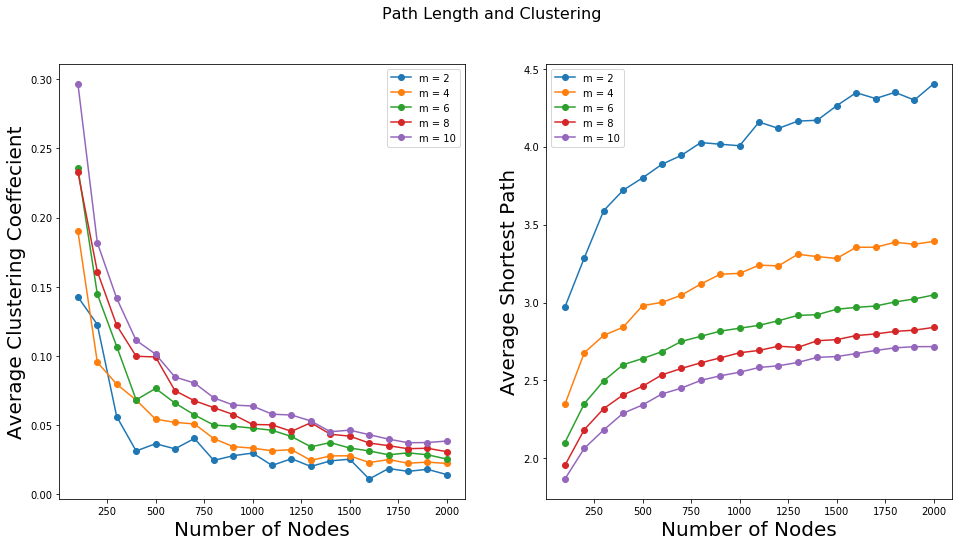

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
import multiprocessing as mp # import for multiprocessing because it costs time a lot.
from tqdm import tqdm # import for check progress
%matplotlib inline

parameters = [] # save parameters
total_avg_cc = {} # Average Clustering Coefficient
total_avg_sp = {} # Average Shortest path length

for n in range(100,2001,100): # Number of Nodes
    for m in range(2,11,2): # Number of Edges
        parameters.append((n,m))

# define the function to get measurement from a graph that set with given parameters
def get_measurement(n,m):
    G = nx.barabasi_albert_graph(n, m)
    avg_cc = nx.average_clustering(G)
    avg_sp = nx.average_shortest_path_length(G)
    return n, m, avg_cc, avg_sp

# define the function to save the result of 'get_measurement'
def update(result):
    n, m, avg_cc, avg_sp = result
    total_avg_cc[(n,m)] = avg_cc
    total_avg_sp[(n,m)] = avg_sp
    pbar.update(1)

# set how many workers(cores) you want to use 
# be careful when you use it. check first the available number of cores you can use!
# if you want to check, you can use : 'mp.cpu_count()'
available_cores = mp.cpu_count()
print(f'available_cores : {available_cores}')
multiprocessor = mp.Pool(processes=36)
pbar = tqdm(total=len(parameters))
pbar.set_description('[ Calculating ]')
    
# make a graph and its measurements with multiprocessing 
for n,m in parameters:
    multiprocessor.apply_async(get_measurement, args=(n,m,), callback=update)
    
multiprocessor.close()
multiprocessor.join()
pbar.close()

# Draw figure
fig, plot = plt.subplots(1,2)
fig.set_size_inches(16, 8)
fig.suptitle('Path Length and Clustering', fontsize=16)

measurement_names = ['Average Clustering Coeffecient', 'Average Shortest Path']

for idx, measurment in enumerate([total_avg_cc, total_avg_sp]):
    ylabel = measurement_names[idx]
    for m in range(2,11,2): 
        average_m = [measurment[(n,m)] for n in range(100,2001,100)]
        plot[idx].plot(range(100,2001,100),average_m, marker='o')
        plot[idx].set_xlabel('Number of Nodes', fontsize=20)
        plot[idx].set_ylabel(ylabel, fontsize=20)
    plot[idx].legend([f'm = {m}' for m in range(2,11,2)])

For the clustering side, we see that as the number of nodes increases, the average clustering coefficient also decreases and it becomes very small. <br>
And so even at 2,000 nodes, we see that the average clustering coefficient is very small, at like 0.05 or so.

And we have seen networks of millions and millions of nodes that had a much larger clustering coefficient.<br>
And so it seems like the preferential attachment model, while it has the small average shortest path property, fails to have these cluster and coefficient, high cluster and coefficient property. 

**the reason is that, there is no mechanism in the preferential attachment model that would favor triangle formation.**

<hr>

### Small World Model

**Motivation** : Real networks exhibit high clustering coefficient and small average shortest paths. 
<br>Can we think of a model that achives both of these properties?

**Small-World model** :
* Start with a ring of $n$ nodes, where each node is connected to its $k$ nearest neighbors.
* Fix a parameter $p \in [0,1]$
* Consider each edge $(u,v)$. with probability $p$, select a node $w$ at random and rewire the edge $(u,v)$ so it becomes $(u,w)$.

Example : $k=2, p = 0.4$ : *plz check this example, which is on the original ppt file of this class*

<br>
So let's think about, what happens to this network as we sort of change this parameter $p$, which ends up being the kind of most interesting parameter of the network?<br><br>

<img src="./figures/Small_World_Model.png" width="500" height="500">

* **Regular Lettice $(P = 0)$** : No edge is rewired.<br>
  because every node is connected to k of its neighbors, then there are lots of triangles that get formed locally.<br>
  it depends on the value of k, but if k is sort of large enough, then you start to form many triangles.<br><br>
* **Random Network $(P = 1)$** : All edge are rewired.<br>
  this network will have pretty high clustering coefficient because it purposely going to form triangles in the beginning.<br> And then nothing gets rewire, nothing gets changed, so it has a pretty high clustering coefficient.<br><br>
* **Small Word Network $(0< P < 1)$** : Some edges are rewired. Network conserves some local structure but has some randomness.<br>
  what you have is that some edges get rewire, so you create some long bridges. And so the distances between nodes, the average distance gets reduced.<br>
  But the local structure depending on p can be maintained.<br><br>
  
  
**What is the average clustering coefficient and shortest path of a small world network?** It depends on parameter $k$ and $p$.

So here are two plots where on the x axis we have the value of p, and on the y axis, we have the average shortest path and the average clustering.<br>
you can check this plot at [Samll World Model in NetworkX](#Small-WorldMoel-in-NetwokrX)
**as $p$ increases from 0 to 0.1 :**
* average shortest path decreases rapidly.
* average clustering coefficient decrease slowly.
<br>
An instance of a networtk of 1000 nodes, $k = 6$ and $p = 0.04$ has : 
* 8.99 average shortest path
* 0.53 average clustering coefficient

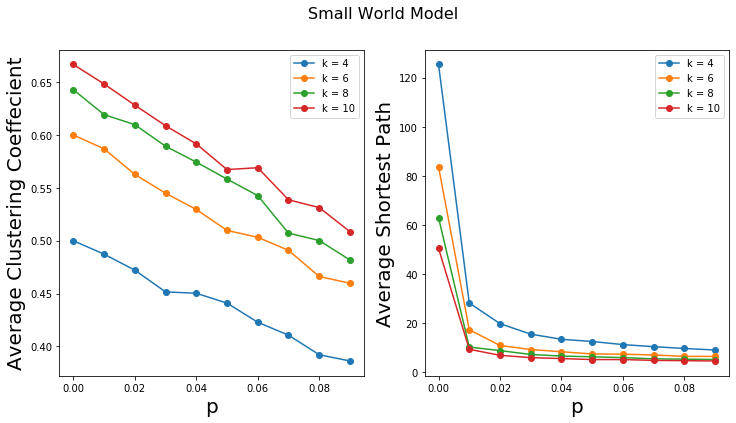

In [2]:
fig, plot = plt.subplots(1,2)
fig.set_size_inches(12, 6)
fig.suptitle('Small World Model', fontsize=16)

measurement_names = ['Average Clustering Coeffecient', 'Average Shortest Path']

for k in range(4,11,2):
    avg_cc = []
    avg_sp = []
    pvalue = []
    for p in range(10):
        p *= 1e-2
        pvalue.append(p)
        
        G = nx.watts_strogatz_graph(1000,k,p)
        avg_cc.append(nx.average_clustering(G))
        avg_sp.append(nx.average_shortest_path_length(G))
    plot[0].plot(pvalue, avg_cc, marker='o')
    plot[1].plot(pvalue, avg_sp, marker='o')
    
for i, name in enumerate(measurement_names):
    plot[i].set_xlabel("p", fontsize=20)
    plot[i].set_ylabel(name, fontsize=20)
    plot[i].legend([f'k = {k}' for k in range(4,11,2)])

<hr>

### Small WorldMoel in NetwokrX

`watts_strogatz_graph(n,k,p)` returns a small world network with $n$ nodes, starting with a ring lattice with each node connected to its k-nearest neighbors, and rewiring probability $p$.

Variants of the small world model in NetworkX : 
* Small world networks can be disconnected, which is sometime undesirable.

`connected_watts_strogatz_graph(n,k,p,t)` runs `watts_strogatz_graph(n,k,p)` up to $t$ times, until it returns a connected small world network.<br>
it kind of keeps trying different iterations of the model until it gets one that's connected. <br>
Unless it runs out of tries, which if it tries more than t times, then it returns some type of error.
* newman_watts_strogatz_graph(n,k,p) runs a model similar to the small world model, but rather than rewiring edges, **new edges are added with probability $k$**

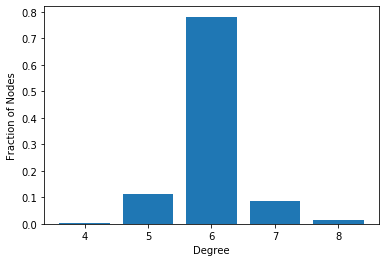

In [3]:
G = nx.watts_strogatz_graph(1000,6,4e-2)
degrees = dict(G.degree())
degree_values = sorted(degrees.values())
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()